In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt

from tensor import Tensor
import nn

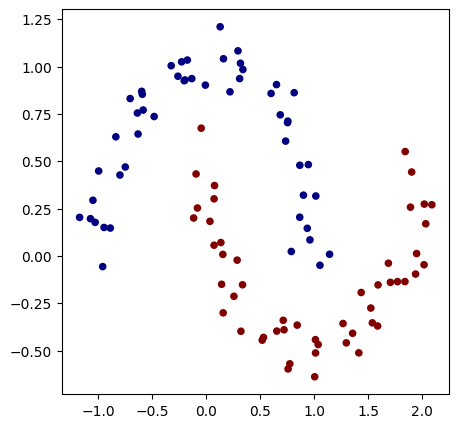

In [2]:
X, targets = make_moons(n_samples=100, noise=0.1)
targets = np.expand_dims(targets, axis=-1)
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=targets, s=20, cmap='jet')

In [3]:
X.shape, targets.shape

((100, 2), (100, 1))

In [4]:
model = nn.Sequential([
    nn.Linear(2, 20),
    nn.ReLU(),
    nn.Linear(20, 50), 
    nn.ReLU(),
    nn.Linear(50, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
])

In [5]:
def accuracy(x, y):
    x = np.array([[1 if pred > 0.5 else 0 for pred in x]])
    y = y.reshape(x.shape)
    return np.sum(x == y) / 100

In [6]:
losses, accs = [], []
lr = 0.5
loss_fn = nn.MSELoss()

for _ in range(100):
    preds = model(X)
    loss = loss_fn(preds, targets)
    acc = accuracy(preds, targets)
    print(f'Loss: {loss.data[0][0]:.4f}\tAccuracy: {100 * acc:.2f}%')
    loss.backward()
    # run SGD
    for param in model.parameters():
        param.data = param.data - lr * param.grad
        
    losses.append(loss.data[0][0])
    accs.append(acc)
    model.zero_grad()

Loss: 0.5702	Accuracy: 42.00%
Loss: 0.4668	Accuracy: 51.00%
Loss: 0.4703	Accuracy: 52.00%
Loss: 0.3788	Accuracy: 59.00%
Loss: 0.4757	Accuracy: 51.00%
Loss: 0.3237	Accuracy: 68.00%
Loss: 0.3212	Accuracy: 68.00%
Loss: 0.3141	Accuracy: 68.00%
Loss: 0.2550	Accuracy: 74.00%
Loss: 0.2476	Accuracy: 75.00%
Loss: 0.2463	Accuracy: 75.00%
Loss: 0.2481	Accuracy: 75.00%
Loss: 0.2385	Accuracy: 76.00%
Loss: 0.2281	Accuracy: 77.00%
Loss: 0.2208	Accuracy: 77.00%
Loss: 0.0937	Accuracy: 91.00%
Loss: 0.0860	Accuracy: 91.00%
Loss: 0.0845	Accuracy: 91.00%
Loss: 0.2507	Accuracy: 75.00%
Loss: 0.1999	Accuracy: 78.00%
Loss: 0.4451	Accuracy: 50.00%
Loss: 0.1156	Accuracy: 87.00%
Loss: 0.1221	Accuracy: 87.00%
Loss: 0.0937	Accuracy: 91.00%
Loss: 0.0872	Accuracy: 90.00%
Loss: 0.0901	Accuracy: 89.00%
Loss: 0.2494	Accuracy: 75.00%
Loss: 0.2309	Accuracy: 77.00%
Loss: 0.1590	Accuracy: 82.00%
Loss: 0.1497	Accuracy: 84.00%
Loss: 0.1086	Accuracy: 88.00%
Loss: 0.1113	Accuracy: 87.00%
Loss: 0.1480	Accuracy: 84.00%
Loss: 0.10

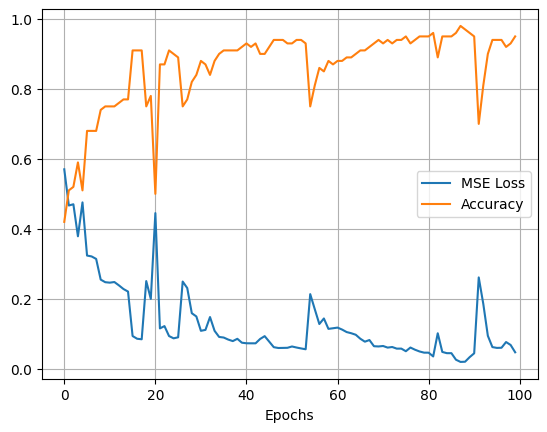

In [7]:
plt.plot(losses, label='MSE Loss')
plt.plot(accs, label='Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()